<a href="https://colab.research.google.com/github/AndreMacielSousa/22292-Deep-Learning-Aplicado/blob/main/DL_CHA4_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Deep Learning SIMPLIFIED**

https://www.youtube.com/watch?v=EzbGiB_6TSI&list=PLjJh1vlSEYgvGod9wWiydumYl8hOXixNu&index=13&ab_channel=DeepLearning.TV


**Machine Learning with Python**

https://www.freecodecamp.org/learn/machine-learning-with-python/

**TensorFlow**

https://colab.research.google.com/drive/1F_EWVKa8rbMXi3_fG0w7AtcscFq7Hi7B






---

Listing 4.11 Loading the Reuters dataset



In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)
print(len(train_data))
print(len(test_data))

train_data[10]

Listing 4.12 Decoding newswires back to text


In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 

train_labels[10]

550378/550378 [==============================] - 0s 0us/step


3

Listing 4.13 Encoding the input data


In [11]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1. 
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Exemplo:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Listing 4.14 Encoding the labels


In [14]:
#
# def to_one_hot(labels, dimension=46):
#  results = np.zeros((len(labels), dimension))
#  for i, label in enumerate(labels):
#   results[i, label] = 1.
#  return results
# y_train = to_one_hot(train_labels) 
# y_test = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Listing 4.15 Model definition


In [16]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [17]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

Listing 4.17 Setting aside a validation set


In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Listing 4.18 Training the model


In [19]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 31ms/step - loss: 2.5315 - accuracy: 0.4878 - val_loss: 1.6950 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4257 - accuracy: 0.6959 - val_loss: 1.3286 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0839 - accuracy: 0.7596 - val_loss: 1.1675 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8558 - accuracy: 0.8188 - val_loss: 1.0625 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6837 - accuracy: 0.8566 - val_loss: 0.9926 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5466 - accuracy: 0.8869 - val_loss: 0.9623 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4407 - accuracy: 0.9082 - val_loss: 0.9236 - val_accuracy: 0.8040
Epoch 8/20
16

Listing 4.19 Plotting the training and validation loss


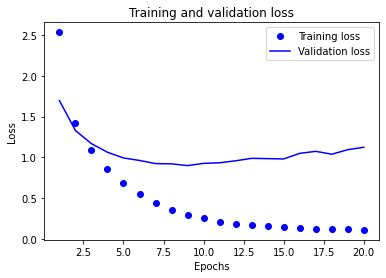

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Listing 4.20 Plotting the training and validation accuracy


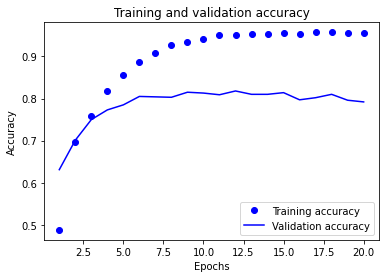

In [23]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Listing 4.21 Retraining a model from scratch


In [25]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.5666 - accuracy: 0.5100
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.3560 - accuracy: 0.7100
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9977 - accuracy: 0.7869
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7807 - accuracy: 0.8312
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6142 - accuracy: 0.8726
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4850 - accuracy: 0.8996
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3867 - accuracy: 0.9192
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3156 - accuracy: 0.9305
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9518 - accuracy: 0.7952
[0.9518029093742371, 0.7951914668083191]


This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case, we have 46 classes, and they may not be equally represented. What would be
the accuracy of a random baseline? We could try quickly implementing one to check
this empiricall

In [26]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19723953695458593

As you can see, a random classifier would score around 19% classification accuracy, so
the results of our model seem pretty good in that light. 

In [29]:
predictions = model.predict(x_test)
print("predictions[0].shape:\t", predictions[0].shape)
print("np.sum(predictions[0])\t", np.sum(predictions[0]))
print("np.argmax(predictions[0])\t", np.argmax(predictions[0]))

71/71 [==============================] - 0s 2ms/step
predictions[0].shape:	 (46,)
np.sum(predictions[0])	 1.0
np.argmax(predictions[0])	 3
